In [2]:
include("GP_BMDP_ROVER/CustomGP.jl")
using Random
using Statistics
using Distributions
using Plots
using KernelFunctions
using LinearAlgebra

In [3]:
k = with_lengthscale(SqExponentialKernel(), 2.0) # NOTE: check length scale
m(x) = 0 
X_query = [[i] for i = 1:0.1:10]
query_size = size(X_query)
KXqXq = K(X_query, X_query, k)
GP = GaussianProcess(m, μ(X_query, m), k, [], X_query, [], [], [], [], KXqXq);
f_prior = GP

GaussianProcess(m, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Scale Transform (s = 0.5), Any[], [[1.0], [1.1], [1.2], [1.3], [1.4], [1.5], [1.6], [1.7], [1.8], [1.9]  …  [9.1], [9.2], [9.3], [9.4], [9.5], [9.6], [9.7], [9.8], [9.9], [10.0]], Any[], Any[], Any[], Any[], [1.0 0.9987507809245809 … 5.011200288624759e-5 4.006529739295107e-5; 0.9987507809245809 1.0 … 6.252150377482015e-5 5.011200288624759e-5; … ; 5.011200288624759e-5 6.252150377482015e-5 … 1.0 0.9987507809245809; 4.006529739295107e-5 5.011200288624759e-5 … 0.9987507809245809 1.0])

In [4]:
theme(:default)

In [32]:
true_function = [0.3327420632189866
0.4237755734182195
0.5239490012945907
0.6403885788557804
0.7621964508229211
0.8912688478185459
1.029669134778059
1.1767519631321408
1.3245941417534648
1.4821455795516418
1.6415357037755443
1.8028288119501132
1.9688156692862506
2.1349019641920397
2.298280163098986
2.462124342931278
2.626412311655711
2.783616441230696
2.935640250327008
3.084413287523173
3.227098295605138
3.3607138184252285
3.4901261433726987
3.6075389893805854
3.718369083003196
3.817689661222982
3.9056254032436897
3.984830485533002
4.0522806345696445
4.10207886734619
4.1454235089222315
4.170976646477875
4.185274087013719
4.186541303706641
4.171551861013022
4.143853662814094
4.099387083843969
4.04193216987451
3.970226165714247
3.8848978361332085
3.7818712372019294
3.665342517542702
3.5355226359872662
3.3922955581252294
3.239532687560429
3.0704320304838206
2.8906654298306265
2.7020398377137234
2.504644291137121
2.293585622210491
2.07729649365974
1.8540564871312148
1.6269706168644893
1.3929876516355146
1.1589005825351537
0.9232878771413184
0.6840089803193955
0.4478790170347269
0.2131130054201173
-0.018375613274615177
-0.2433324638162483
-0.46146735045379084
-0.6755436568679509
-0.8781886200040497
-1.0760357051987797
-1.2605002565599654
-1.4345785946298055
-1.5981294278292892
-1.749186456044672
-1.8873369795907402
-2.011223034591149
-2.126033888795646
-2.223410486828297
-2.3104289627661263
-2.3815344401300536
-2.4392384841717383
-2.485592892735364
-2.521126412117749
-2.539339287851885
-2.5480501632871064
-2.5474326801686007
-2.534174423115762
-2.509532327874485
-2.4795099522079553
-2.4360763346180283
-2.386009420247661
-2.330823115881161
-2.2644215568478647
-2.1944388177607106
-2.1175884317732128
-2.0338927011617938]

91-element Vector{Float64}:
  0.3327420632189866
  0.4237755734182195
  0.5239490012945907
  0.6403885788557804
  0.7621964508229211
  0.8912688478185459
  1.029669134778059
  1.1767519631321408
  1.3245941417534648
  1.4821455795516418
  1.6415357037755443
  1.8028288119501132
  1.9688156692862506
  ⋮
 -2.5480501632871064
 -2.5474326801686007
 -2.534174423115762
 -2.509532327874485
 -2.4795099522079553
 -2.4360763346180283
 -2.386009420247661
 -2.330823115881161
 -2.2644215568478647
 -2.1944388177607106
 -2.1175884317732128
 -2.0338927011617938

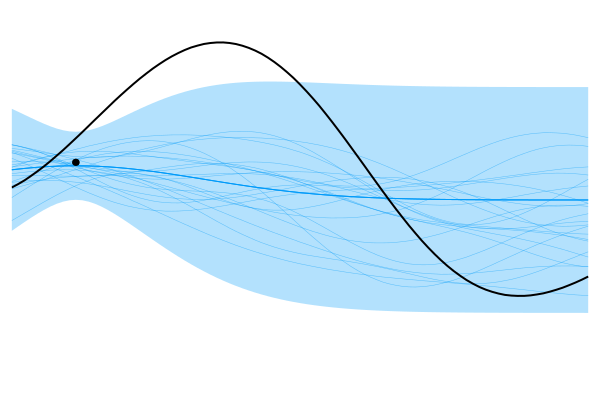

In [66]:
f_posterior = f_prior
y = 1.0
σ²_n = 0.1
x = 2.0
f_posterior = posterior(f_posterior, [[x]], [y], [σ²_n])

μₚ, νₚ, S = query(f_posterior)
plot([X_query[i][1] for i in 1:length(X_query)], μₚ, ribbon = 3 .*sqrt.(νₚ), legend=false, fillalpha=0.3, grid=false, ticks=false, axis=false,linewidth=1)
scatter!([f_posterior.X[i][1] for i in 1:length(f_posterior.X)], [f_posterior.y[i][1] for i in 1:length(f_posterior.y)], color=:black)

rng = MersenneTwister()
for _ = 1:20
    plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)
end
plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)

plot!([X_query[i][1] for i in 1:length(X_query)], μₚ, legend=false, grid=false, ticks=false, axis=false, color=1)
scatter!([f_posterior.X[i][1] for i in 1:length(f_posterior.X)], [f_posterior.y[i][1] for i in 1:length(f_posterior.y)], color=:black)

plot!([X_query[i][1] for i in 1:length(X_query)], true_function, legend=false, grid=false, ticks=false, axis=false, color=:black, linewidth=2, xlims=(1,10), ylims=(-5,5))

In [67]:
savefig("figures/Paper Figures/1.pdf")

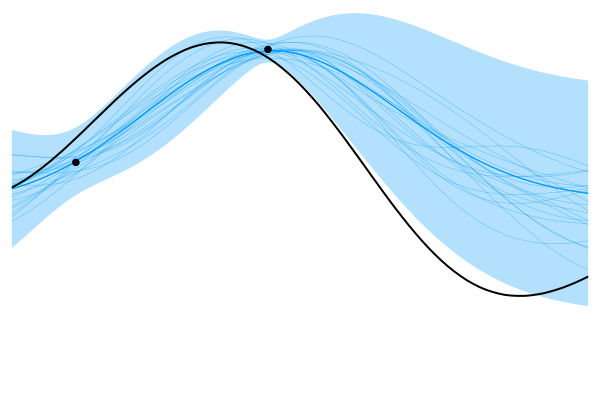

In [68]:
y = 4.
σ²_n = 0.01
x = 5.0
f_posterior = posterior(f_posterior, [[x]], [y], [σ²_n])

μₚ, νₚ, S = query(f_posterior)
plot([X_query[i][1] for i in 1:length(X_query)], μₚ, ribbon = 3 .*sqrt.(νₚ), legend=false, fillalpha=0.3, grid=false, ticks=false, axis=false,linewidth=1)
scatter!([f_posterior.X[i][1] for i in 1:length(f_posterior.X)], [f_posterior.y[i][1] for i in 1:length(f_posterior.y)], color=:black)

rng = MersenneTwister()
for _ = 1:20
    plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)
end
plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)

plot!([X_query[i][1] for i in 1:length(X_query)], μₚ, legend=false, grid=false, ticks=false, axis=false, color=1)
scatter!([f_posterior.X[i][1] for i in 1:length(f_posterior.X)], [f_posterior.y[i][1] for i in 1:length(f_posterior.y)], color=:black)

plot!([X_query[i][1] for i in 1:length(X_query)], true_function, legend=false, grid=false, ticks=false, axis=false, color=:black, linewidth=2, xlims=(1,10), ylims=(-5,5))

In [69]:
savefig("figures/Paper Figures/2.pdf")

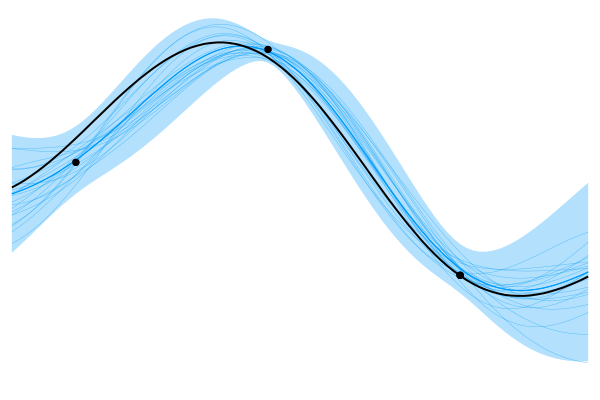

In [71]:
y = -2.
σ²_n = 0.1
x = 8.0
f_posterior = posterior(f_posterior, [[x]], [y], [σ²_n])

μₚ, νₚ, S = query(f_posterior)
plot([X_query[i][1] for i in 1:length(X_query)], μₚ, ribbon = 3 .*sqrt.(νₚ), legend=false, fillalpha=0.3, grid=false, ticks=false, axis=false,linewidth=1)
scatter!([f_posterior.X[i][1] for i in 1:length(f_posterior.X)], [f_posterior.y[i][1] for i in 1:length(f_posterior.y)], color=:black)

rng = MersenneTwister()
for _ = 1:20
    plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)
end
plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)

plot!([X_query[i][1] for i in 1:length(X_query)], μₚ, legend=false, grid=false, ticks=false, axis=false, color=1)
scatter!([f_posterior.X[i][1] for i in 1:length(f_posterior.X)], [f_posterior.y[i][1] for i in 1:length(f_posterior.y)], color=:black)

plot!([X_query[i][1] for i in 1:length(X_query)], true_function, legend=false, grid=false, ticks=false, axis=false, color=:black, linewidth=2, xlims=(1,10), ylims=(-5,5))

In [72]:
savefig("figures/Paper Figures/3.pdf")

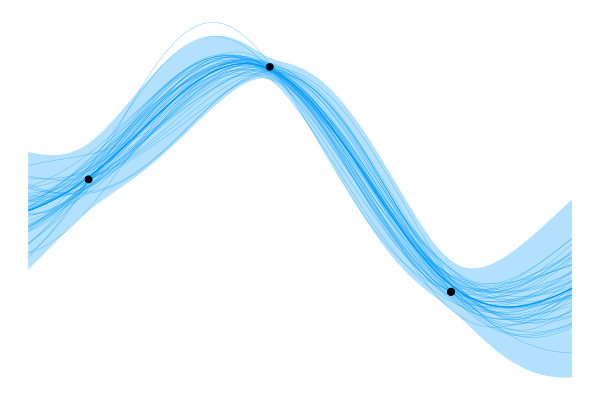

In [126]:
rng = MersenneTwister()
for _ = 1:50
    plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)
end
plot!([X_query[i][1] for i in 1:length(X_query)], rand(rng, f_posterior, μₚ, Matrix(Hermitian(S))), color=1, linewidth=0.5,linealpha=0.5)

plot!([X_query[i][1] for i in 1:length(X_query)], μₚ, legend=false, grid=false, ticks=false, axis=false, color=1)
scatter!([f_posterior.X[i][1] for i in 1:length(f_posterior.X)], [f_posterior.y[i][1] for i in 1:length(f_posterior.y)], color=:black)

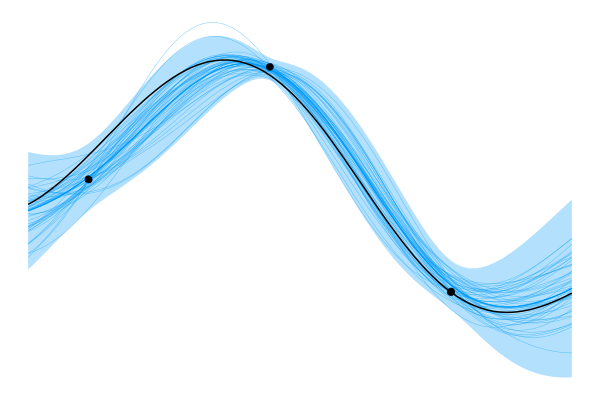

In [127]:
# true_function = rand(rng, f_posterior, μₚ, Matrix(Hermitian(S)))
plot!([X_query[i][1] for i in 1:length(X_query)], true_function, legend=false, grid=false, ticks=false, axis=false, color=:black, linewidth=1.5)

In [114]:
# true_function
# for i=1:size(true_function,1)            println(true_function[i])        end 